# Filling Missing Values
1. Get only the stations filtered on step 1
2. Order each station data as a time series
3. Create interpolation for each station
4. Fill the missing values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy import interpolate

In [2]:
valid_stations = pd.read_csv('without_na_sations.csv')
valid_stations

,station_id,lat,long,year,month,day,hour,forecast,gridpp,observation,observation_quality,gridpp_error,number_of_observations
0,SN18700,59.9423,10.7200,2019,5,13,12,12.47900,11.25000,11.1,0,0.15000,1392.0
1,SN80740,66.9035,13.6460,2019,5,13,12,4.09424,6.15000,6.0,0,0.15000,1392.0
2,SN61630,62.2583,8.2000,2019,5,13,12,1.81200,4.45000,4.3,0,0.15000,1381.0
3,SN8140,61.4255,11.0803,2019,5,13,12,8.86768,9.65000,9.5,0,0.15000,1387.0
4,SN23500,61.1220,9.0630,2019,5,13,12,7.61084,9.65860,8.6,0,1.05860,1383.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,SN61580,62.2943,8.1255,2019,5,13,12,2.43604,5.00507,5.4,0,0.39493,1318.0
501,SN24670,60.2684,9.6919,2019,5,13,12,10.29736,11.67703,10.6,0,1.07703,1317.0
502,SN90490,69.6767,18.9133,2019,5,13,12,4.74950,4.65000,4.5,0,0.15000,1393.0
503,SN77490,65.3143,13.4483,2019,5,13,12,-0.27880,-1.67065,-2.6,0,0.92935,1388.0


In [3]:
all_data = pd.read_csv('../../data/data_initial_preprocessing.csv')
all_data

,station_id,lat,long,year,month,day,hour,forecast,gridpp,observation,observation_quality,gridpp_error
0,SN18700,59.9423,10.7200,2019,5,13,12,12.47900,11.25000,11.1,0,0.15000
1,SN80740,66.9035,13.6460,2019,5,13,12,4.09424,6.15000,6.0,0,0.15000
2,SN61630,62.2583,8.2000,2019,5,13,12,1.81200,4.45000,4.3,0,0.15000
3,SN8140,61.4255,11.0803,2019,5,13,12,8.86768,9.65000,9.5,0,0.15000
4,SN23500,61.1220,9.0630,2019,5,13,12,7.61084,9.65860,8.6,0,1.05860
...,...,...,...,...,...,...,...,...,...,...,...,...
843910,SN61580,62.2943,8.1255,2019,5,13,18,2.25586,5.17270,5.8,0,0.62730
843911,SN24670,60.2684,9.6919,2019,5,13,18,9.25342,11.92026,11.0,0,0.92026
843912,SN90490,69.6767,18.9133,2019,5,13,18,3.75146,3.25000,3.1,0,0.15000
843913,SN77490,65.3143,13.4483,2019,5,13,18,-0.56055,-2.15744,-2.6,0,0.44256


In [4]:
valid_data = all_data.merge(valid_stations, how='inner', on='station_id', suffixes=['', '_y'])

In [5]:
valid_data

,station_id,lat,long,year,month,day,hour,forecast,gridpp,observation,...,year_y,month_y,day_y,hour_y,forecast_y,gridpp_y,observation_y,observation_quality_y,gridpp_error_y,number_of_observations
0,SN18700,59.9423,10.7200,2019,5,13,12,12.47900,11.25000,11.1,...,2019,5,13,12,12.47900,11.25000,11.1,0,0.15000,1392.0
1,SN18700,59.9423,10.7200,2019,5,13,6,5.99194,7.95000,7.8,...,2019,5,13,12,12.47900,11.25000,11.1,0,0.15000,1392.0
2,SN18700,59.9423,10.7200,2019,5,13,0,5.24365,2.75000,2.6,...,2019,5,13,12,12.47900,11.25000,11.1,0,0.15000,1392.0
3,SN18700,59.9423,10.7200,2019,5,12,18,10.88086,10.75000,10.6,...,2019,5,13,12,12.47900,11.25000,11.1,0,0.15000,1392.0
4,SN18700,59.9423,10.7200,2019,5,12,12,12.21900,11.25000,11.1,...,2019,5,13,12,12.47900,11.25000,11.1,0,0.15000,1392.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682226,SN86740,68.6072,14.4347,2019,5,14,18,5.10156,5.07070,5.3,...,2019,5,13,12,5.76123,5.86862,6.0,0,0.13138,1310.0
682227,SN86740,68.6072,14.4347,2019,5,14,12,5.50195,5.49050,5.6,...,2019,5,13,12,5.76123,5.86862,6.0,0,0.13138,1310.0
682228,SN86740,68.6072,14.4347,2019,5,14,6,4.81372,5.33136,5.1,...,2019,5,13,12,5.76123,5.86862,6.0,0,0.13138,1310.0
682229,SN86740,68.6072,14.4347,2019,5,14,0,4.53930,5.16770,4.4,...,2019,5,13,12,5.76123,5.86862,6.0,0,0.13138,1310.0


In [6]:
valid_data.columns

Index(['station_id', 'lat', 'long', 'year', 'month', 'day', 'hour', 'forecast',
       'gridpp', 'observation', 'observation_quality', 'gridpp_error', 'lat_y',
       'long_y', 'year_y', 'month_y', 'day_y', 'hour_y', 'forecast_y',
       'gridpp_y', 'observation_y', 'observation_quality_y', 'gridpp_error_y',
       'number_of_observations'],
      dtype='object')

In [7]:
valid_data = valid_data[valid_data.columns.drop(list(valid_data.filter(regex=r'.+\_y',axis=1)))]

In [8]:
valid_data

,station_id,lat,long,year,month,day,hour,forecast,gridpp,observation,observation_quality,gridpp_error,number_of_observations
0,SN18700,59.9423,10.7200,2019,5,13,12,12.47900,11.25000,11.1,0,0.15000,1392.0
1,SN18700,59.9423,10.7200,2019,5,13,6,5.99194,7.95000,7.8,0,0.15000,1392.0
2,SN18700,59.9423,10.7200,2019,5,13,0,5.24365,2.75000,2.6,0,0.15000,1392.0
3,SN18700,59.9423,10.7200,2019,5,12,18,10.88086,10.75000,10.6,0,0.15000,1392.0
4,SN18700,59.9423,10.7200,2019,5,12,12,12.21900,11.25000,11.1,0,0.15000,1392.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
682226,SN86740,68.6072,14.4347,2019,5,14,18,5.10156,5.07070,5.3,0,0.22930,1310.0
682227,SN86740,68.6072,14.4347,2019,5,14,12,5.50195,5.49050,5.6,0,0.10950,1310.0
682228,SN86740,68.6072,14.4347,2019,5,14,6,4.81372,5.33136,5.1,0,0.23136,1310.0
682229,SN86740,68.6072,14.4347,2019,5,14,0,4.53930,5.16770,4.4,0,0.76770,1310.0


In [9]:
valid_data['datetime'] = valid_data.apply(lambda x: datetime.datetime(x['year'], x['month'], x['day'], x['hour'], 00, 00), axis=1)

/tmp/ipykernel_6677/1663430667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['datetime'] = valid_data.apply(lambda x: datetime.datetime(x['year'], x['month'], x['day'], x['hour'], 00, 00), axis=1)


In [10]:
valid_data

,station_id,lat,long,year,month,day,hour,forecast,gridpp,observation,observation_quality,gridpp_error,number_of_observations,datetime
0,SN18700,59.9423,10.7200,2019,5,13,12,12.47900,11.25000,11.1,0,0.15000,1392.0,2019-05-13 12:00:00
1,SN18700,59.9423,10.7200,2019,5,13,6,5.99194,7.95000,7.8,0,0.15000,1392.0,2019-05-13 06:00:00
2,SN18700,59.9423,10.7200,2019,5,13,0,5.24365,2.75000,2.6,0,0.15000,1392.0,2019-05-13 00:00:00
3,SN18700,59.9423,10.7200,2019,5,12,18,10.88086,10.75000,10.6,0,0.15000,1392.0,2019-05-12 18:00:00
4,SN18700,59.9423,10.7200,2019,5,12,12,12.21900,11.25000,11.1,0,0.15000,1392.0,2019-05-12 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682226,SN86740,68.6072,14.4347,2019,5,14,18,5.10156,5.07070,5.3,0,0.22930,1310.0,2019-05-14 18:00:00
682227,SN86740,68.6072,14.4347,2019,5,14,12,5.50195,5.49050,5.6,0,0.10950,1310.0,2019-05-14 12:00:00
682228,SN86740,68.6072,14.4347,2019,5,14,6,4.81372,5.33136,5.1,0,0.23136,1310.0,2019-05-14 06:00:00
682229,SN86740,68.6072,14.4347,2019,5,14,0,4.53930,5.16770,4.4,0,0.76770,1310.0,2019-05-14 00:00:00


In [11]:
test = valid_data[valid_data.station_id == 'SN20540'].sort_values(by=['datetime'])
test

,station_id,lat,long,year,month,day,hour,forecast,gridpp,observation,observation_quality,gridpp_error,number_of_observations,datetime
656282,SN20540,60.3558,10.5592,2019,1,1,0,1.095900,3.32312,1.8,0,1.52312,1374.0,2019-01-01 00:00:00
656281,SN20540,60.3558,10.5592,2019,1,1,6,0.354950,0.72790,-0.4,0,1.12790,1374.0,2019-01-01 06:00:00
656280,SN20540,60.3558,10.5592,2019,1,1,12,3.122300,4.37076,5.2,0,0.82924,1374.0,2019-01-01 12:00:00
656279,SN20540,60.3558,10.5592,2019,1,1,18,0.784670,2.01248,2.7,0,0.68752,1374.0,2019-01-01 18:00:00
656278,SN20540,60.3558,10.5592,2019,1,2,0,-1.823730,-0.39770,0.1,0,0.49770,1374.0,2019-01-02 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656050,SN20540,60.3558,10.5592,2019,12,30,18,2.493408,2.23285,1.0,0,1.23285,1374.0,2019-12-30 18:00:00
656049,SN20540,60.3558,10.5592,2019,12,31,0,0.942383,1.56122,3.1,0,1.53878,1374.0,2019-12-31 00:00:00
656048,SN20540,60.3558,10.5592,2019,12,31,6,0.038086,-0.47153,2.1,0,2.57153,1374.0,2019-12-31 06:00:00
656047,SN20540,60.3558,10.5592,2019,12,31,12,0.700928,1.74014,2.9,0,1.15986,1374.0,2019-12-31 12:00:00


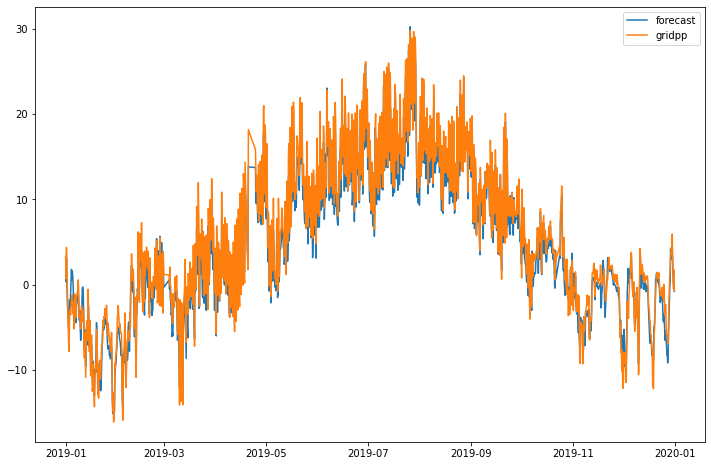

In [12]:
plt.figure(figsize=(12,8))
plt.plot(test['datetime'], test['forecast'], label='forecast')
plt.plot(test['datetime'], test['gridpp'], label='gridpp')
plt.legend()
plt.show()

In [13]:
test.datetime.min()

Timestamp('2019-01-01 00:00:00')

In [14]:
test.datetime.max()

Timestamp('2019-12-31 18:00:00')

In [15]:
datetime.datetime(2019, 12, 31, 18, 0, 0) + datetime.timedelta(hours=6) + datetime.timedelta(hours=6)

datetime.datetime(2020, 1, 1, 6, 0)

5. Estabelecer data mínima e uma data máxima
6. Fazer um loop com timedelta de 6h pra definir todos os datetimes que deveriam existir.
7. Fazer o fit da interpolação pra cada estação
8. Associar isso com cada estação
9. Fazer um merge pedindo pra deixar NA onde de fato seria NA

In [16]:
start_date = '2019-01-01T00:00'
end_date = '2020-01-01T00:00'
delta = np.timedelta64(6, 'h')

In [17]:
range_of_datetime = np.arange(start_date, end_date, delta, dtype='datetime64[h]')
range_of_datetime

array(['2019-01-01T00', '2019-01-01T06', '2019-01-01T12', ...,
       '2019-12-31T06', '2019-12-31T12', '2019-12-31T18'],
      dtype='datetime64[h]')

In [18]:
df_datetime = pd.DataFrame(range_of_datetime, columns=['datetime'])

In [62]:
test_with_na = df_datetime.merge(valid_data, how='left', on=['station_id', 'datetime'])
test_with_na.reset_index(inplace=True)
test_with_na

,index,datetime,station_id,lat,long,year,month,day,hour,forecast,gridpp,observation,observation_quality,gridpp_error,number_of_observations
0,0,2019-01-01 00:00:00,SN86740,68.6072,14.4347,2019.0,1.0,1.0,0.0,0.237000,0.79037,0.2,0.0,0.59037,1310.0
1,1,2019-01-01 06:00:00,SN86740,68.6072,14.4347,2019.0,1.0,1.0,6.0,0.839800,1.57983,1.0,0.0,0.57983,1310.0
2,2,2019-01-01 12:00:00,SN86740,68.6072,14.4347,2019.0,1.0,1.0,12.0,0.092040,0.77393,-1.1,0.0,1.87393,1310.0
3,3,2019-01-01 18:00:00,SN86740,68.6072,14.4347,2019.0,1.0,1.0,18.0,-0.457030,0.40814,-1.0,0.0,1.40814,1310.0
4,4,2019-01-02 00:00:00,SN86740,68.6072,14.4347,2019.0,1.0,2.0,0.0,-0.087900,0.75558,-0.2,0.0,0.95558,1310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,2019-12-30 18:00:00,SN86740,68.6072,14.4347,2019.0,12.0,30.0,18.0,1.502686,2.33570,2.1,0.0,0.23570,1310.0
1456,1456,2019-12-31 00:00:00,SN86740,68.6072,14.4347,2019.0,12.0,31.0,0.0,0.640137,2.03406,2.0,0.0,0.03406,1310.0
1457,1457,2019-12-31 06:00:00,SN86740,68.6072,14.4347,2019.0,12.0,31.0,6.0,2.192871,2.79343,2.4,0.0,0.39343,1310.0
1458,1458,2019-12-31 12:00:00,SN86740,68.6072,14.4347,2019.0,12.0,31.0,12.0,1.662354,2.35626,2.0,0.0,0.35626,1310.0


In [87]:
test_with_na['lat'].apply(lambda x: 1 if np.isnan(x) else 0)

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: lat, Length: 1460, dtype: int64

In [84]:
np.isnan(test_with_na['lat'][2])

False

In [88]:
stations = valid_stations.station_id
columns = ['forecast', 'gridpp', 'observation']
default_columns = ['lat', 'long']

for station in stations:
    df_datetime['station_id'] = station

    test_with_na = df_datetime.merge(valid_data, how='left', on=['station_id', 'datetime'])
    test_with_na.reset_index(inplace=True)

    test_with_na['filled'] = test_with_na['lat'].apply(lambda x: 1 if np.isnan(x) else 0)

    for column in columns:
        f = interpolate.interp1d(test_with_na.dropna()['index'], test_with_na.dropna()[column], bounds_error=False, fill_value='extrapolate')
        y_new = f(test_with_na['index'])

        test_with_na[column] = y_new.round(4)

    for column in default_columns:
        test_with_na[column] = test_with_na[column].max()

    # Filling datetime columns that are possible empty
    test_with_na['year'] = test_with_na['datetime'].apply(lambda x: x.year)
    test_with_na['month'] = test_with_na['datetime'].apply(lambda x: x.month)
    test_with_na['day'] = test_with_na['datetime'].apply(lambda x: x.day)
    test_with_na['hour'] = test_with_na['datetime'].apply(lambda x: x.hour)

    test_with_na.to_csv(f'test/{station}.csv', index=False)

In [61]:
test_with_na

,index,datetime,station_id,lat,long,year,month,day,hour,forecast,gridpp,observation,observation_quality,gridpp_error,number_of_observations
0,0,2019-01-01 00:00:00,SN86740,68.6072,14.4347,2019,1,1,0,0.2370,0.7904,0.2,0.0,0.59037,1310.0
1,1,2019-01-01 06:00:00,SN86740,68.6072,14.4347,2019,1,1,6,0.8398,1.5798,1.0,0.0,0.57983,1310.0
2,2,2019-01-01 12:00:00,SN86740,68.6072,14.4347,2019,1,1,12,0.0920,0.7739,-1.1,0.0,1.87393,1310.0
3,3,2019-01-01 18:00:00,SN86740,68.6072,14.4347,2019,1,1,18,-0.4570,0.4081,-1.0,0.0,1.40814,1310.0
4,4,2019-01-02 00:00:00,SN86740,68.6072,14.4347,2019,1,2,0,-0.0879,0.7556,-0.2,0.0,0.95558,1310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,2019-12-30 18:00:00,SN86740,68.6072,14.4347,2019,12,30,18,1.5027,2.3357,2.1,0.0,0.23570,1310.0
1456,1456,2019-12-31 00:00:00,SN86740,68.6072,14.4347,2019,12,31,0,0.6401,2.0341,2.0,0.0,0.03406,1310.0
1457,1457,2019-12-31 06:00:00,SN86740,68.6072,14.4347,2019,12,31,6,2.1929,2.7934,2.4,0.0,0.39343,1310.0
1458,1458,2019-12-31 12:00:00,SN86740,68.6072,14.4347,2019,12,31,12,1.6624,2.3563,2.0,0.0,0.35626,1310.0


TODO:
- lat|long: Default. Repeat the same value.
- year|month|day|hour: Split datetime.
- forecast|gridpp|observation: Interpolate.
- Save each station in a csv?
